In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extended-crab-age-prediction/train_extended.csv
/kaggle/input/retail-data/new_retail_data.csv
/kaggle/input/london-weather-data/london_weather.csv
/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmanuelfwerr/london-weather-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/london-weather-data


In [3]:
df=pd.read_csv('/kaggle/input/london-weather-data/london_weather.csv')

In [4]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [6]:
df.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [7]:

# Drop rows with any missing values
df= df.dropna()


In [8]:
df.isna().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

## Principal Component Analysis

#### Normalisation

In [9]:
import pandas as pd


pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
print(df.head(30))

        date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0   19790101          2.0       7.0              52.0       2.3       -4.1   
1   19790102          6.0       1.7              27.0       1.6       -2.6   
2   19790103          5.0       0.0              13.0       1.3       -2.8   
3   19790104          8.0       0.0              13.0      -0.3       -2.6   
4   19790105          6.0       2.0              29.0       5.6       -0.8   
5   19790106          5.0       3.8              39.0       8.3       -0.5   
6   19790107          8.0       0.0              13.0       8.5        1.5   
7   19790108          8.0       0.1              15.0       5.8        6.9   
8   19790109          4.0       5.8              50.0       5.2        3.7   
9   19790110          7.0       1.9              30.0       4.9        3.3   
10  19790111          1.0       6.8              55.0       2.9        2.6   
11  19790112          3.0       6.4              54.0       2.0 

In [10]:
unnormalized_columns =list(df.columns)
unnormalized_columns

['date',
 'cloud_cover',
 'sunshine',
 'global_radiation',
 'max_temp',
 'mean_temp',
 'min_temp',
 'precipitation',
 'pressure',
 'snow_depth']

In [11]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[unnormalized_columns])



In [12]:
df_standardized[0]

array([-1.61589836, -1.63619599,  0.68651976, -0.71254256, -1.94346252,
       -2.66376532, -2.76587739, -0.33946339,  0.33911007, 16.42345345])

In [48]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [13]:
X=np.array(df_standardized)

In [50]:
X.shape

(13843, 10)

In [51]:
X=np.array(X)

#### Covariance

In [14]:
cov_matrix = np.cov(X, rowvar=False)

In [15]:
from numpy.linalg import eig
(valeurs_propres,vecteurs_propres)=eig(cov_matrix)
valeurs_propres.shape

(10,)

In [16]:
pourcentage_information=(valeurs_propres / valeurs_propres.sum())*100
pourcentage_information

array([37.92565186, 19.57047712, 10.39573877, 10.72236915,  9.25157903,
        6.53787108,  3.26490779,  1.50979462,  0.66224865,  0.15936194])

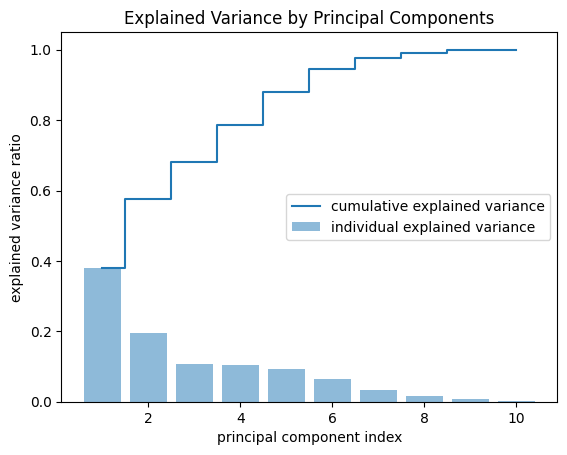

In [17]:
import matplotlib.pyplot as plt
tot = sum(valeurs_propres)

# Computing the explained variance for each principal component
var_exp = [i / tot for i in sorted(valeurs_propres, reverse=True)]

# Calculating the cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# Plotting the explained variance
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('explained variance ratio')
plt.xlabel('principal component index')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()


In [57]:
X[0]

array([-1.61589836, -1.63619599,  0.68651976, -0.71254256, -1.94346252,
       -2.66376532, -2.76587739, -0.33946339,  0.33911007, 16.42345345])

In [18]:

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

Projecting 10-dimensional data to 2D


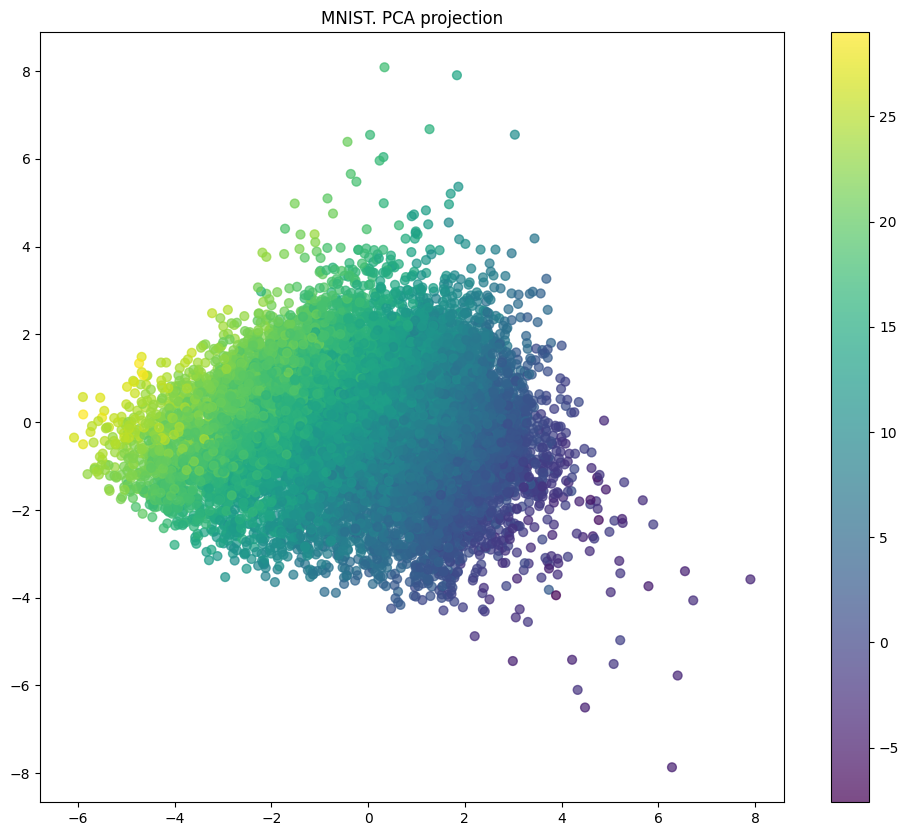

In [18]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['mean_temp'], alpha=0.7, s=40);
plt.colorbar()
plt.title('MNIST. PCA projection');

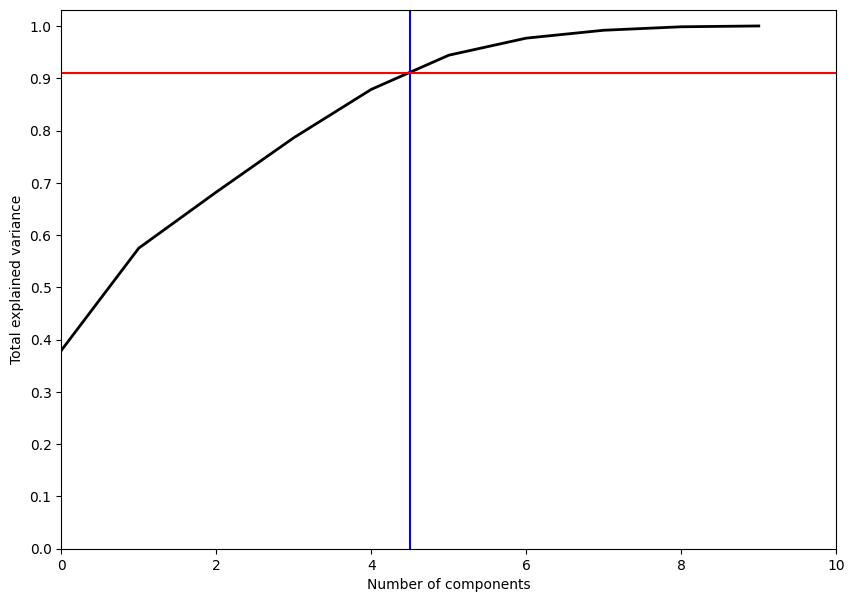

In [19]:
pca = decomposition.PCA().fit(X)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 10)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(4.5, c='b')
plt.axhline(0.91, c='r')
plt.show();

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000,random_state = 17)

df_tsne_scaled = tsne.fit_transform(X)



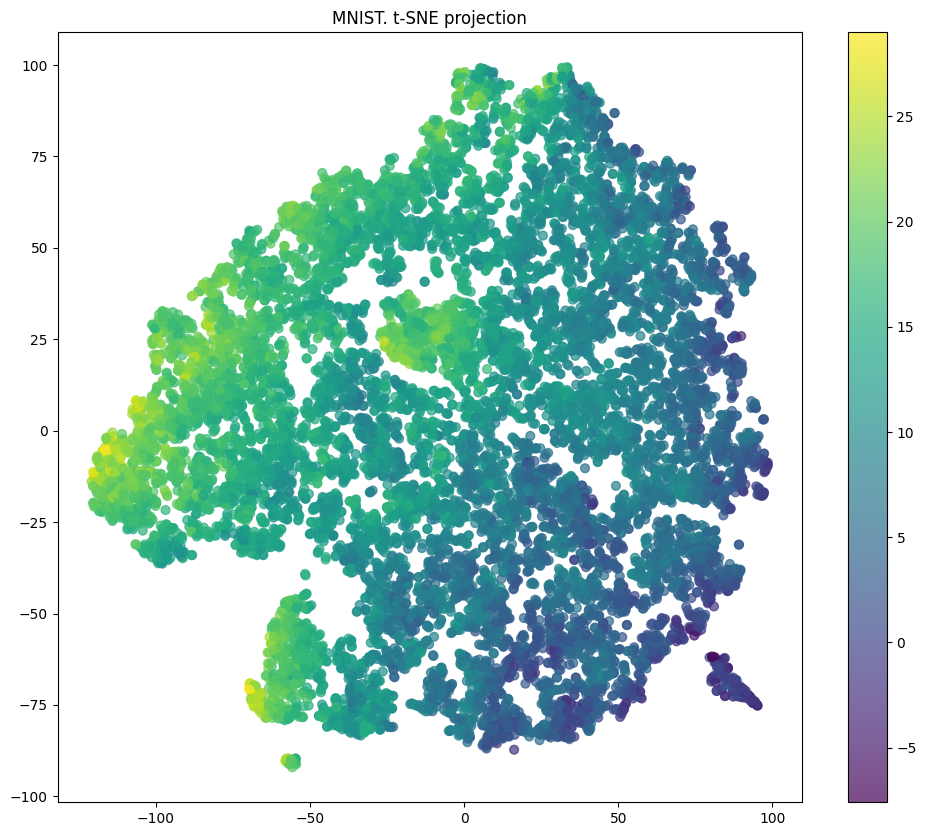

In [22]:
plt.figure(figsize=(12,10))
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=df['mean_temp'],
            alpha=0.7, s=40)
plt.colorbar()
plt.title('MNIST. t-SNE projection');

## CAH

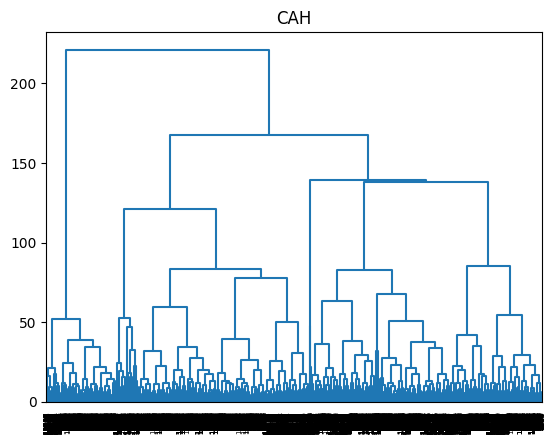

In [19]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# générer la matrice des liens
Z = linkage(X,method='ward', metric='euclidean')

Z.shape
#affichage du dendogramme
plt.title("CAH")
dendrogram(Z, color_threshold=0)  
plt.show()


In [20]:
Z.shape

(13842, 4)

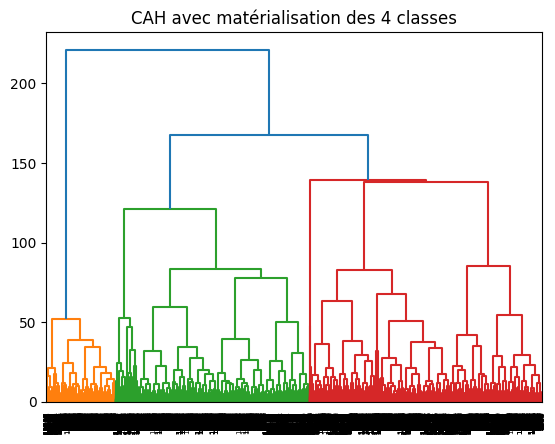

In [22]:
# matérialisation des 4 classes (hauteur t=7)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z, orientation='top', color_threshold=145)
plt.show()

In [31]:
from scipy.cluster.hierarchy import fcluster
groupes_cah = fcluster(Z, t=7, criterion='distance')

idg = np.argsort(groupes_cah)


pd.DataFrame(df.index[idg],groupes_cah[idg])

,0
1,11500
1,12935
1,12934
1,12924
1,11877
...,...
272,3929
272,3923
272,296
272,284


In [25]:
df=pd.DataFrame(X)

In [32]:
#K-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)

#index triés des groupes
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes
print(pd.DataFrame(df.index[idk],kmeans.labels_[idk]))

#distance aux centres de classes des observations
print(kmeans.transform(X))

#correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah,kmeans.labels_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        0
0    7973
0    7957
0    7955
0    7954
0    7953
..    ...
3    4955
3    4956
3    4942
3   13741
3   13772

[13843 rows x 1 columns]
[[17.47485148  2.39801091 16.79462737 17.70047707]
 [15.56354284  2.87642889 14.9059278  16.11280523]
 [ 8.9918782   9.75764945  7.89250805  9.99455912]
 ...
 [ 3.1977484  17.62224993  2.65657789  4.26173367]
 [ 4.74480944 17.59359421  3.27626955  4.87369386]
 [ 3.34002549 17.52159439  2.60596     4.96442586]]


col_0,0,1,2,3
row_0,,,,
1,0,0,0,58
2,0,0,0,43
3,0,0,0,59
4,0,0,0,40
5,0,0,0,27
...,...,...,...,...
268,14,0,1,54
269,2,0,1,42
270,0,0,0,43


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[0.25949005 0.20550981 0.18969808 0.19612009 0.19632035 0.19441829
 0.18021659 0.17309602 0.17545779]


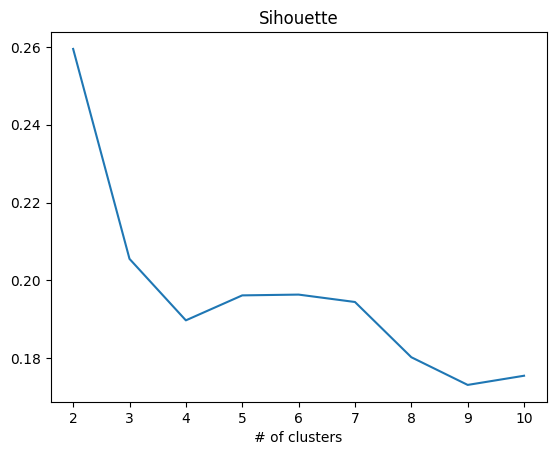

In [33]:
#librairie pour évaluation des partitions
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res= np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(X)
    res[k] = metrics.silhouette_score(X,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Sihouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res) 
plt.show()